# 6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [2]:
# import data
# Create path
path = r'/Users/dana/Documents/Pew Research Reading Project/'

# import data
data = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'multiTimeline.csv'))

In [3]:
data.head(5)

,Category: All categories
Month,ebook: (United States)
2004-01,45
2004-02,43
2004-03,35
2004-04,37


In [4]:
data.shape

(227, 1)

In [5]:
data.columns

Index(['Category: All categories'], dtype='object')

In [6]:
type(data)

pandas.core.frame.DataFrame

### 2. Subsetting, wrangling, and cleaning time-series data

In [7]:
# Reset index so that you can use the "Date" column as a filter

data = data.reset_index()

In [8]:
data.head()

,index,Category: All categories
0,Month,ebook: (United States)
1,2004-01,45
2,2004-02,43
3,2004-03,35
4,2004-04,37


In [9]:
data = data.drop([0])

In [10]:
data.head()

,index,Category: All categories
1,2004-01,45
2,2004-02,43
3,2004-03,35
4,2004-04,37
5,2004-05,37


In [11]:
data = data.rename(columns={'index':'Date','Category: All categories':'Search Interest Score'})

In [12]:
data.head()

,Date,Search Interest Score
1,2004-01,45
2,2004-02,43
3,2004-03,35
4,2004-04,37
5,2004-05,37


In [13]:
data.dtypes

Date                     object
Search Interest Score    object
dtype: object

In [14]:
data['Search Interest Score'] = data['Search Interest Score'].astype('int64')

In [15]:
data.head()

,Date,Search Interest Score
1,2004-01,45
2,2004-02,43
3,2004-03,35
4,2004-04,37
5,2004-05,37


In [16]:
data_2 = data['Search Interest Score']

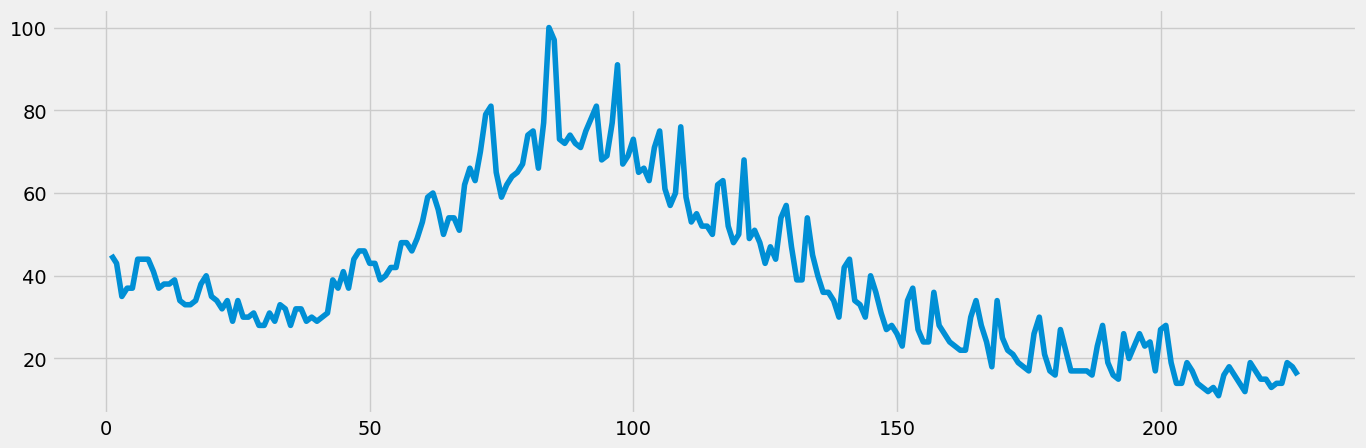

In [17]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data_2)

In [18]:
# seperate Year and Month from Date
data['Year'] = pd.DatetimeIndex(data['Date']).year

In [19]:
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [20]:
# add Day as 1
data['Day'] = 1

In [21]:
data.head(15)

,Date,Search Interest Score,Year,Month,Day
1,2004-01,45,2004,1,1
2,2004-02,43,2004,2,1
3,2004-03,35,2004,3,1
4,2004-04,37,2004,4,1
5,2004-05,37,2004,5,1
6,2004-06,44,2004,6,1
7,2004-07,44,2004,7,1
8,2004-08,44,2004,8,1
9,2004-09,41,2004,9,1
10,2004-10,37,2004,10,1


In [22]:
# remove Date
data = data.drop(columns=['Date'])

In [23]:
# convert to datetime
from datetime import datetime

data['datetime'] = pd.to_datetime(data[['Year','Month','Day']]) # Create a datetime column

In [24]:
# Set the datetime column as the index

data = data.set_index('datetime')

In [25]:
data.head()

,Search Interest Score,Year,Month,Day
datetime,,,,
2004-01-01,45,2004,1,1
2004-02-01,43,2004,2,1
2004-03-01,35,2004,3,1
2004-04-01,37,2004,4,1
2004-05-01,37,2004,5,1


In [26]:
# drop the date columns
data.drop(columns = ['Year','Month','Day'], inplace=True) 
data.head()

,Search Interest Score
datetime,
2004-01-01,45
2004-02-01,43
2004-03-01,35
2004-04-01,37
2004-05-01,37


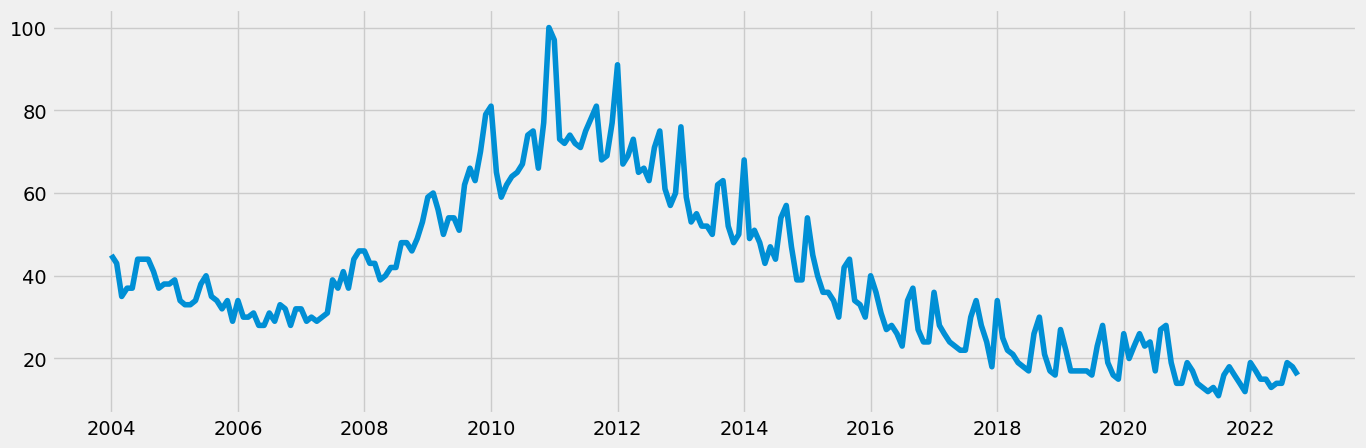

In [27]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [28]:
# Check for missing values

data.isnull().sum() 

Search Interest Score    0
dtype: int64

In [29]:
data.shape

(226, 1)

### 3. Time-series analysis: decomposition

In [30]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [31]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

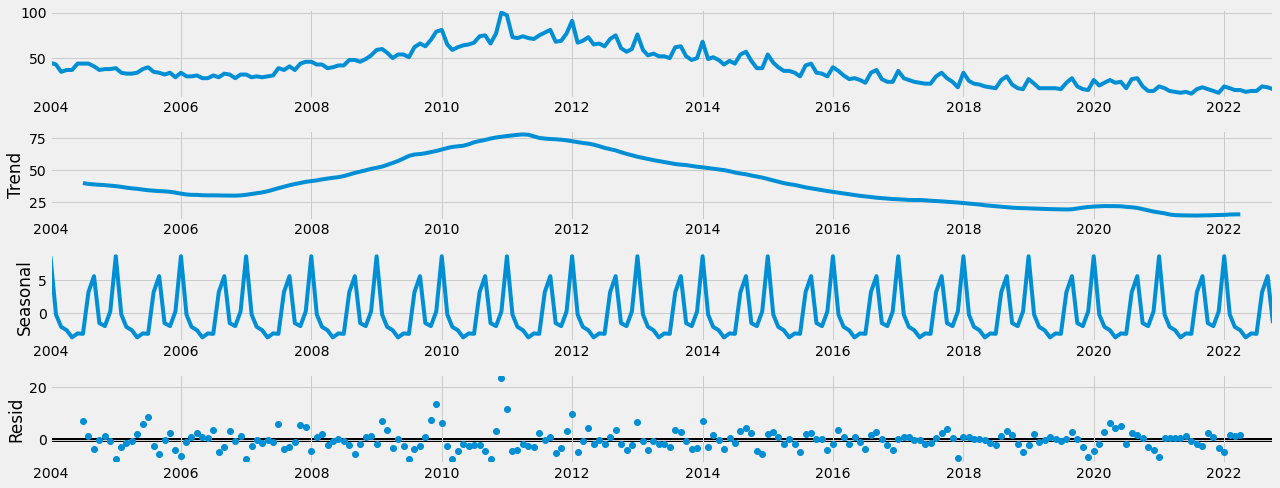

In [32]:
# Plot the separate components

decomposition.plot()
plt.show()

In [33]:
# this shows that there is seasonality to my data, there is a lot of noise, and that the trend shows a high point
# around 2011/2012 and decreases after that

### 4. Testing for stationarity

In [34]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Search Interest Score'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.527519
p-value                          0.519857
Number of Lags Used             14.000000
Number of Observations Used    211.000000
Critical Value (1%)             -3.461727
Critical Value (5%)             -2.875337
Critical Value (10%)            -2.574124
dtype: float64


In [35]:
# The critical value is less than the test statistic so that means I can't disprove my null hypothesis,
# which means that my data is not stationary

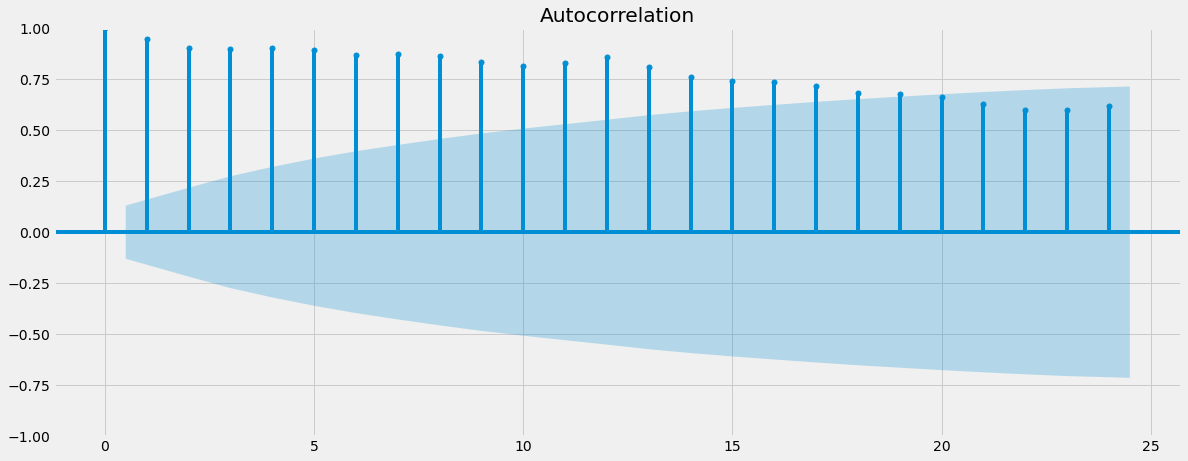

In [36]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plt.show()

In [37]:
# this chart also shows that the data is non-stationary because the lines go above the shaded area

### 5. Stationarizing the Federal Reserve Economic Data

In [38]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = data - data.shift(1) 

In [39]:
# remove the missing values that came about as a result of the differencing
data_diff.dropna(inplace = True)

In [40]:
data_diff.head()

,Search Interest Score
datetime,
2004-02-01,-2.0
2004-03-01,-8.0
2004-04-01,2.0
2004-05-01,0.0
2004-06-01,7.0


In [41]:
data_diff.columns

Index(['Search Interest Score'], dtype='object')

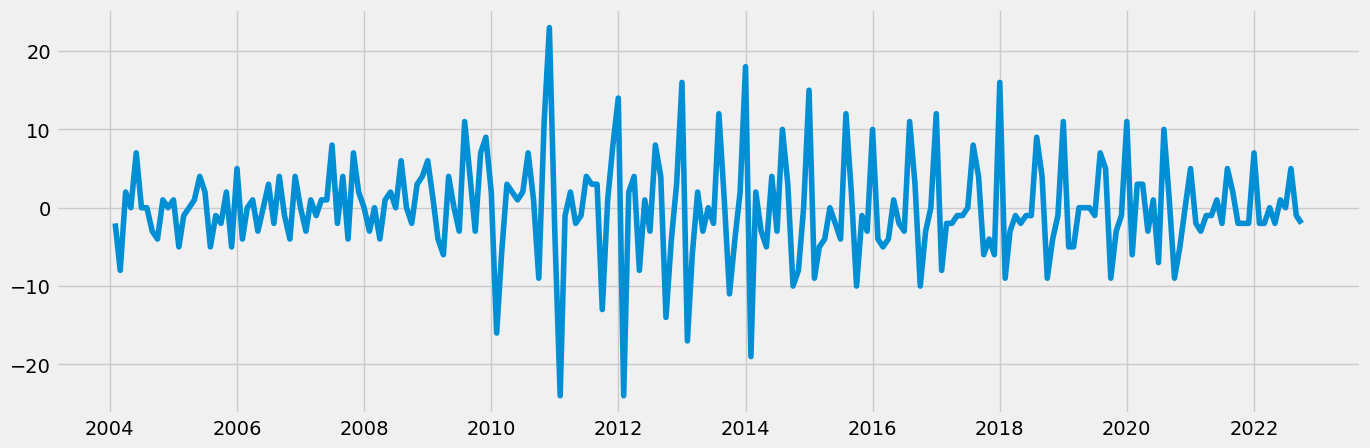

In [42]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [43]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.188691
p-value                          0.210376
Number of Lags Used             13.000000
Number of Observations Used    211.000000
Critical Value (1%)             -3.461727
Critical Value (5%)             -2.875337
Critical Value (10%)            -2.574124
dtype: float64


In [44]:
# the critical value is still slightly less than test statistic and the p-value is not less than 0.05

In [45]:
# conduct a second round of differencing
data_diff2 = data_diff - data_diff.shift(1) 

In [46]:
# remove the missing values that came about as a result of the differencing
data_diff2.dropna(inplace = True)

In [47]:
data_diff2.head()

,Search Interest Score
datetime,
2004-03-01,-6.0
2004-04-01,10.0
2004-05-01,-2.0
2004-06-01,7.0
2004-07-01,-7.0


In [48]:
data_diff2.columns

Index(['Search Interest Score'], dtype='object')

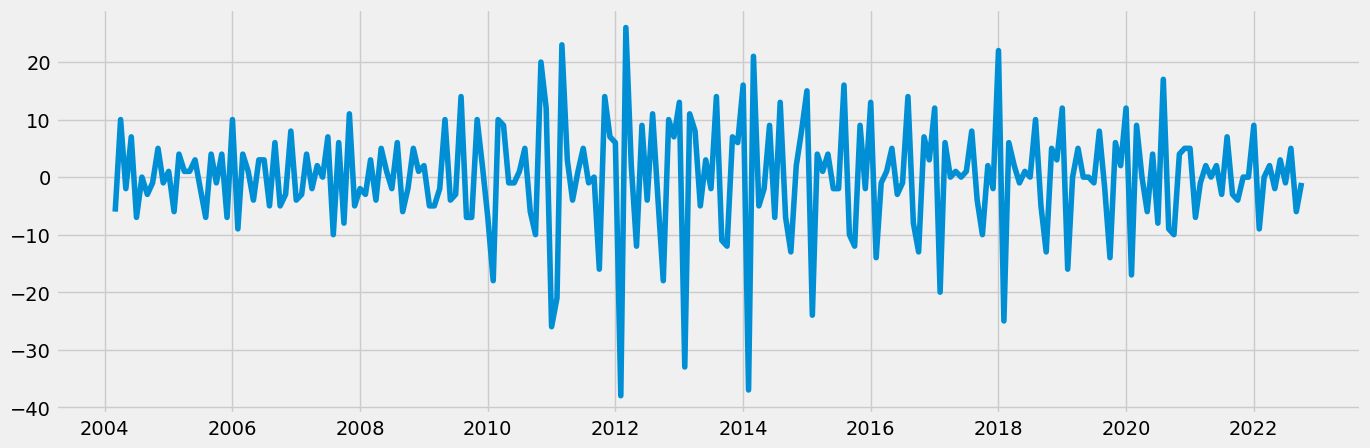

In [49]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [50]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -1.181216e+01
p-value                        8.808189e-22
Number of Lags Used            1.200000e+01
Number of Observations Used    2.110000e+02
Critical Value (1%)           -3.461727e+00
Critical Value (5%)           -2.875337e+00
Critical Value (10%)          -2.574124e+00
dtype: float64


In [51]:
# this got much worse...try log transformation instead

In [52]:
# do log transform on data before differencing it because it can only be used on positive numbers
data_log = np.log(data)

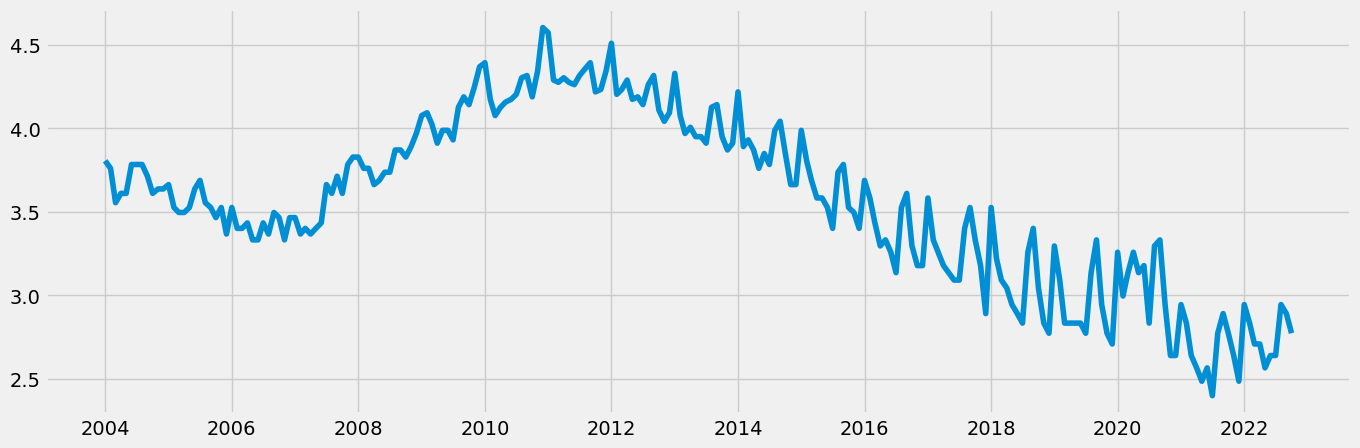

In [53]:
# Check out what the log transformation did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_log)

In [54]:
# now try differencing

In [55]:
data_diff = data_log - data_log.shift(1) 

In [56]:
# remove the missing values that came about as a result of the differencing
data_diff.dropna(inplace = True)

In [57]:
data_diff.head()

,Search Interest Score
datetime,
2004-02-01,-0.045462
2004-03-01,-0.205852
2004-04-01,0.055570
2004-05-01,0.000000
2004-06-01,0.173272


In [58]:
data_diff.columns

Index(['Search Interest Score'], dtype='object')

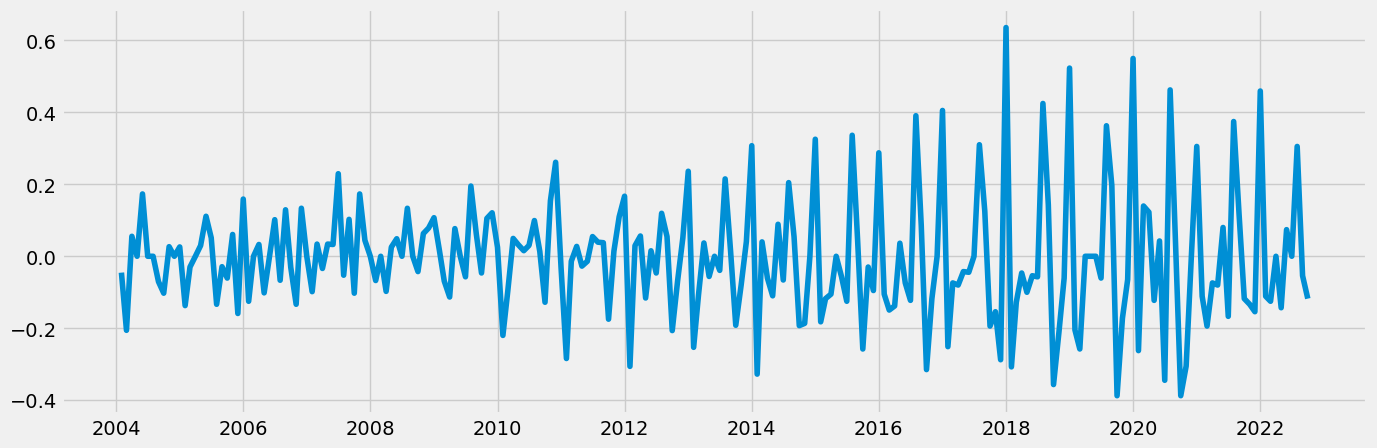

In [59]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [60]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.058965
p-value                          0.029743
Number of Lags Used             15.000000
Number of Observations Used    209.000000
Critical Value (1%)             -3.462032
Critical Value (5%)             -2.875471
Critical Value (10%)            -2.574195
dtype: float64


In [61]:
# test statistic is now less than critical value and p-value is less than 0.05 which means success!
# the data is now stationary

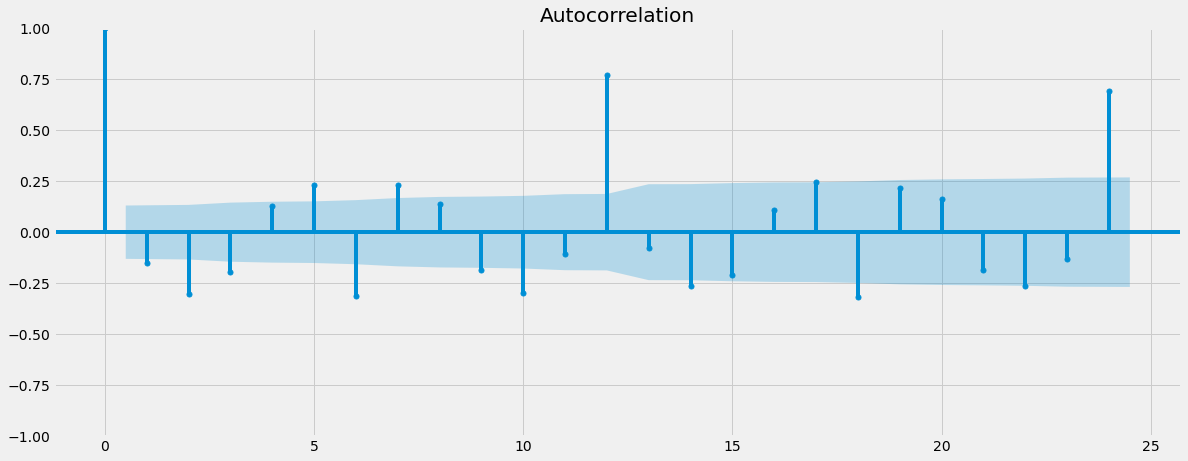

In [62]:
plot_acf(data_diff)
plt.show()

In [63]:
# less lines are above the shaded area